# Perceptron + letters

Autor: Adam Polański

## Klasa Perceptron

Klasa została utworzona podczas poprzednich zajęć zgodnie z instrukcją z pliku perceptron.pdf.

In [ ]:
import numpy as np
class Perceptron(object):
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.errors_ = []
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi
        self.w_[0] += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]
  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


## Klasa SLP

####Tworzenie klasy SLP krok po kroku:
##### 1. Na początku stworzyłem konstruktor klasy. Nie ma tu nic szczególnego.

##### 2. Stworzyłem metode ```fit(self, X, y)``` , a w niej: 
  - listę ```self.errors_ = []```, która w przyszłości będzie przechowywała sumę błędów wszystkich perceptronów w każdej kolejnej iteracji (epochu).
  - listę ```self.perceptrons_ = [0] * len(X)```, która będzie przechowywała tyle obiektów klasy ```Perceptron```, aby na każdą litere przypadał dokładnie jeden z nich.
  
  Następnie dla każdej litery tworze obiekt typu ```Perceptron``` i wywołuje metode ```fit()``` tego obiektu, przekazując w argumentach wszsytkie 10 liter oraz odpowiedni wektor oczekiwanej odpowiedzi.

  Następne linijki tej funkcji to sumowanie błędów do listy ```self.errors_```.

##### 3. Tworzę metode ```predict(self, X)```, która ma za zadanie generować wektory odpowiedzi. Tworzę w niej 2-wymiarową tablice zer, każdy wiersz odpowiada za odpowiedzi jednego perceptrona, a każda kolumna za jedną literę przekazaną w postaci elementu listy X. Dla każdego perceptrona wywołuje metode ```predict()``` i jej wynik zapisuje do odpowiedniego wiersza. Na koniec zwracam uzyskany zestaw odpowiedzi.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
class SLP(object):
  def __init__(self, eta=0.05, n_iter=10, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    self.errors_ = []
    self.perceptrons_ = [0] * len(X)
    for i in range(0, len(X)):
      self.perceptrons_[i] = Perceptron(eta=self.eta, n_iter=self.n_iter, random_state=self.random_state)
      self.perceptrons_[i].fit(X, y[i])
      if len(self.errors_) == 0:
        self.errors_ = self.perceptrons_[i].errors_
      else:
        self.errors_ = [sum(j) for j in zip(self.errors_, self.perceptrons_[i].errors_)]

  def predict(self, X):
    self.predictions = np.zeros((len(self.perceptrons_), len(self.perceptrons_)))
    for i in range(0, len(self.perceptrons_)):
      self.predictions[i, :] = self.perceptrons_[i].predict(X)
    return self.predictions
  
  def misclassified(self, X, y):
    result = 0
    predictions = self.predictions
    predictions = [list(map(lambda x: int(x * (-1)), i)) for i in predictions]
    for i in range(0, len(y)):
      result =  result + (sum(map(lambda x: abs(x) // 2, map(sum, zip(predictions[i], y[i])))))
      #print(list(map(lambda x: abs(x) // 2, map(sum, zip(predictions[i], y[i])))))
    return result    
      

  def show(self, X):
    fig, axs = plt.subplots(2, 5, figsize=(14, 8), sharex='col', sharey='row')

    for i, x in enumerate(X):
      ax = axs[i // 5, i % 5]
      ax.imshow(x.reshape(7, 5), cmap='binary')

    plt.show()

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving letters.data to letters (1).data


In [ ]:
net = SLP()

import io
df = pd.read_csv(io.BytesIO(uploaded['letters.data']))
my_cases = '10 11 12 13 14 15 16 17 18 19'   # dane z przykładu
#my_cases = '2 4 8 9 12 13 14 17 20 23'
my_cases = my_cases.split()
my_cases = list(map(lambda x: x - 1, list(map(int, my_cases))))
print(my_cases)
df = df.iloc[my_cases]
df.head(10)



[9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


,-1,1,1.1,1.2,-1.1,1.3,-1.2,-1.3,-1.4,1.4,...,-1.32,-1.33,-1.34,-1.35,-1.36,-1.37,-1.38,-1.39,-1.40,-1.41
9,1,-1,-1,-1,1,1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
10,1,-1,-1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
11,1,-1,-1,-1,1,1,1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
12,1,-1,-1,-1,1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
13,-1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
14,1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
15,-1,1,1,1,-1,1,-1,-1,-1,1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
16,1,1,1,1,-1,1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
17,-1,1,1,1,-1,1,-1,-1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
18,1,1,1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1


In [ ]:
X = df.iloc[:, :35].values
y = df.iloc[:, 35:].values
y = y[:, list(map(lambda x: x + 1, my_cases))]

print(X)
print('\n\n')
print(y)

[[ 1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1
  -1  1 -1 -1  1 -1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1  1  1  1  1]
 [ 1 -1 -1 -1  1  1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1  1  1 -1 -1  1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1  1 -1
   1  1 -1 -1  1  1 -1  1  1  1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1 -1  1 -1  1 -1
  -1  1 -1 -1  1 -1  1 -1 -1 -1  1]
 [-1  1  1  1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1
   1  1 -1 -1 -1  1 -1  1  1  1 -1]
 [ 1  1  1

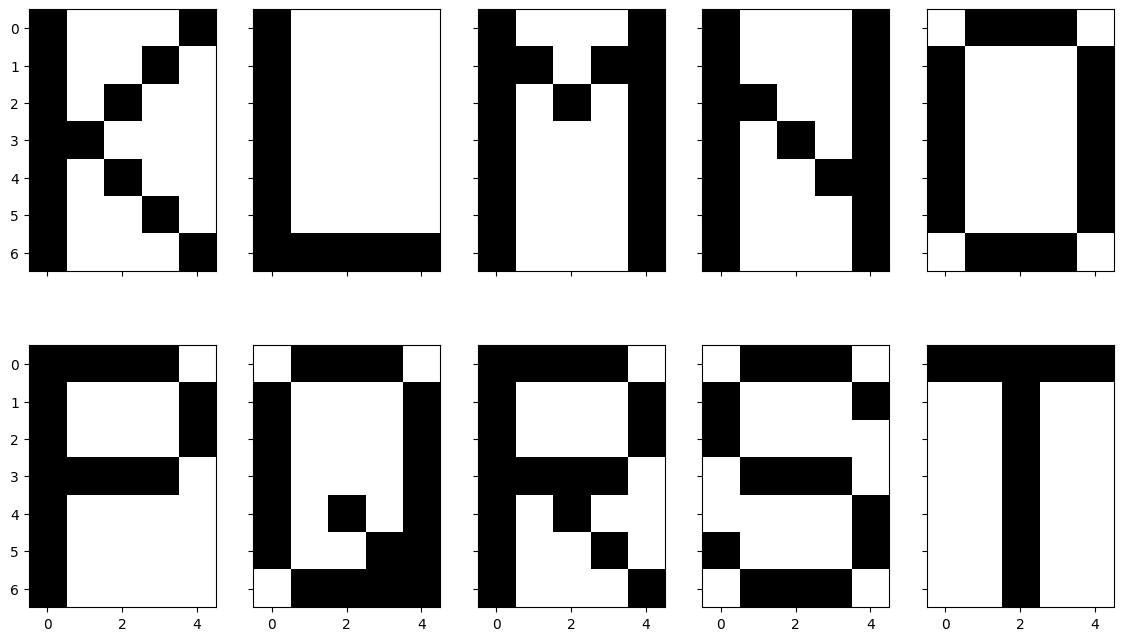

In [ ]:
net.show(X)

In [ ]:
net.fit(X, y)

In [ ]:
print(net.predict(X))

[[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]]


[35, 13, 9, 4, 1, 0, 0, 0, 0, 0]


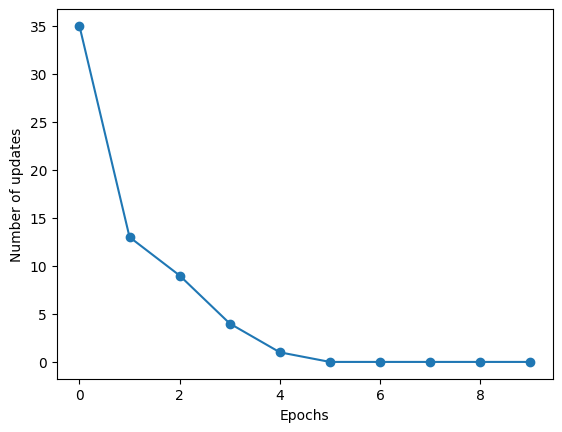

In [ ]:
print(net.errors_)
plt.plot(range(0, len(net.errors_) ), net.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [ ]:
print(net.misclassified(X, y))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0


In [ ]:
def damage(X, percent, seed=1):
  rgen = np.random.RandomState(seed)
  result = np.array(X)
  count = int(X.shape[1]*percent/100)

  for indeks_example in range(len(X)):
    order = np.sort(rgen.choice(X.shape[1], count, replace=False))
    for indeks_pixel in order:
      result[indeks_example][indeks_pixel] *= -1
  
  return result

In [ ]:
damaged5 = damage(X, 5)
damaged15 = damage(X, 15)
damaged40 = damage(X, 40)

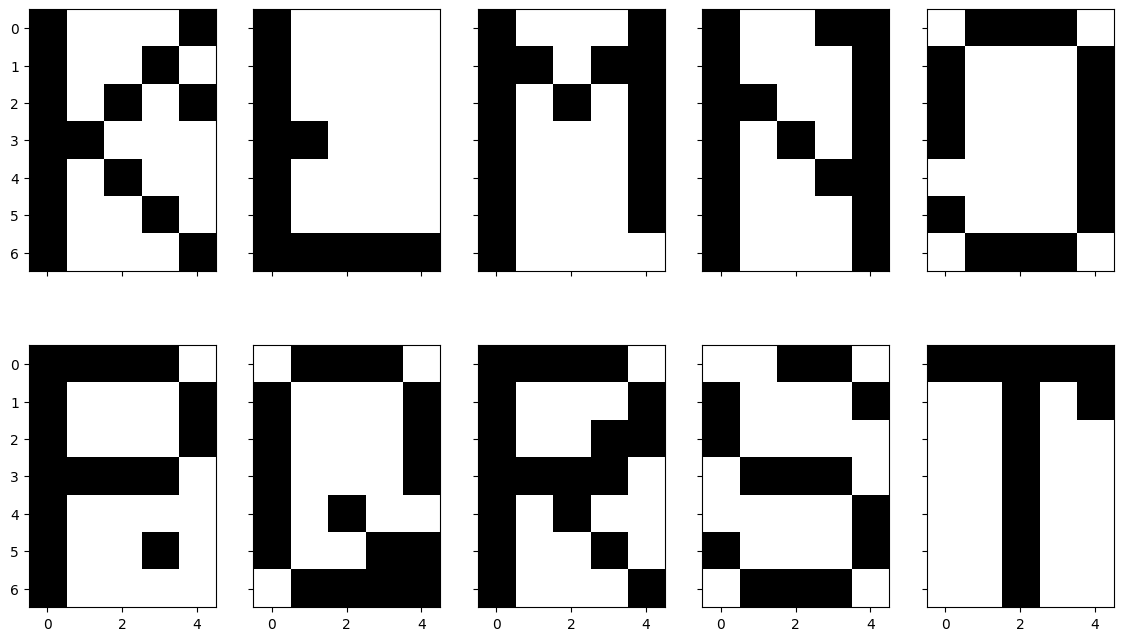

In [ ]:
net.show(damaged5)

In [ ]:
print(net.predict(damaged5))

[[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1.  1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]]


In [ ]:
print(net.misclassified(damaged5, y))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3


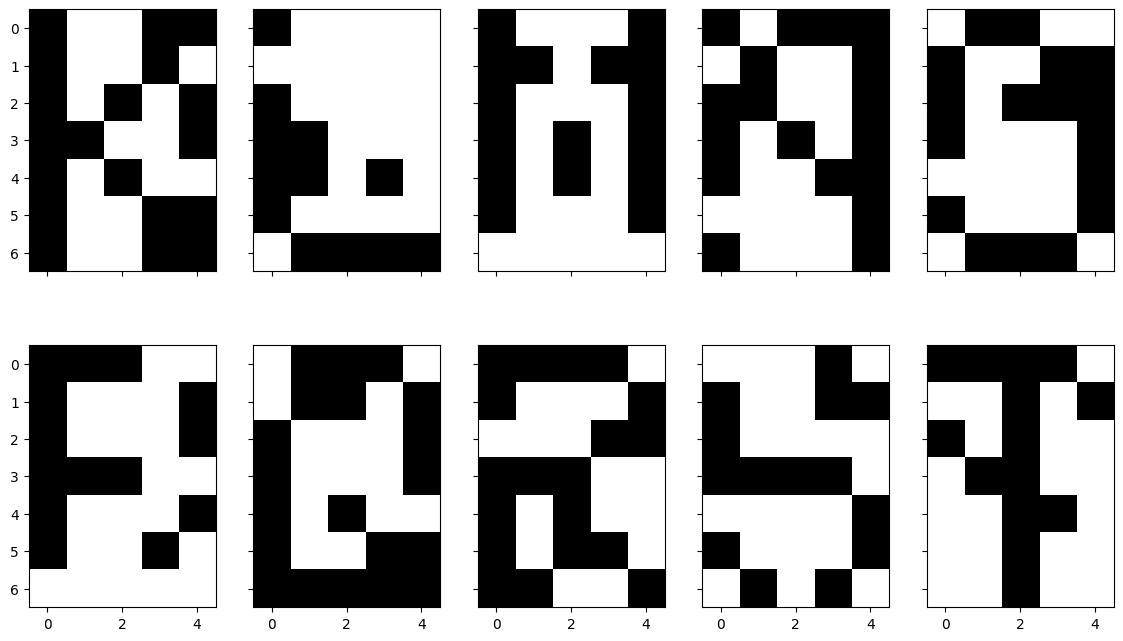

In [ ]:
net.show(damaged15)

In [ ]:
print(net.predict(damaged15))

[[ 1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1.  1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1.  1.  1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.  1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1.  1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]]


In [ ]:
print(net.misclassified(damaged15, y))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4


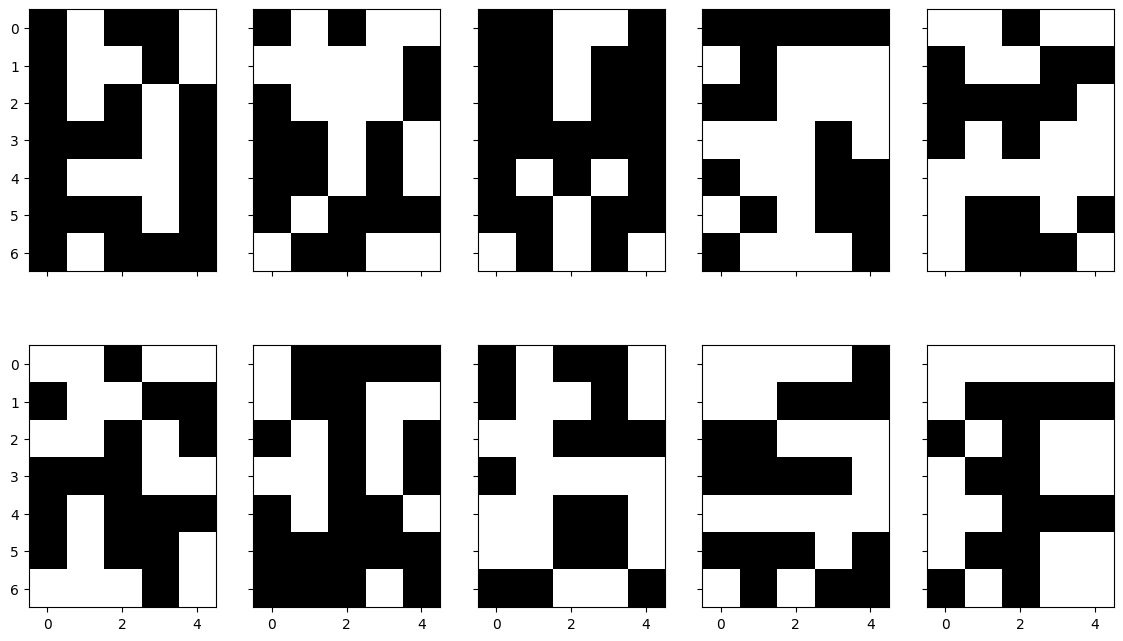

In [ ]:
net.show(damaged40)

In [ ]:
print(net.predict(damaged40))

[[-1. -1.  1. -1. -1.  1. -1.  1.  1.  1.]
 [-1.  1. -1. -1.  1. -1. -1.  1.  1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
 [-1. -1. -1.  1. -1. -1. -1. -1.  1.  1.]
 [-1. -1. -1. -1.  1. -1. -1. -1. -1. -1.]
 [-1.  1. -1. -1.  1. -1. -1. -1. -1.  1.]
 [-1. -1. -1. -1. -1. -1.  1.  1. -1. -1.]
 [-1.  1.  1.  1. -1. -1. -1.  1. -1. -1.]
 [-1.  1.  1. -1.  1. -1. -1. -1.  1. -1.]
 [-1. -1. -1. -1. -1. -1.  1. -1. -1.  1.]]


In [ ]:
print(net.misclassified(damaged40, y))

[1, 0, 1, 0, 0, 1, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
25
